In [2]:
import numpy as np
from gensim import corpora, models
import gensim
import csv
import _pickle as cPickle
from sklearn.externals import joblib
import bz2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
lda = joblib.load('data/ldamodel_20_EOS.pkl')
dictionary = gensim.corpora.Dictionary.load_from_text('data/dictionary_EOS.txt')
corpus = gensim.corpora.MmCorpus('data/nostopwords_corpus_EOS.mm')

FileNotFoundError: [Errno 2] No such file or directory: 'data/ldamodel_20_EOS.pkl'

In [3]:
color = []
for corpus_line in corpus:
    sorted_topic_line = list(sorted(lda[corpus_line], key=lambda x: x[1], reverse=True))
    color.append(sorted_topic_line[0][0])
    
    
lda_output = []
for line in corpus:
    lda_output.append(lda[line])
    
topics_data = np.zeros(shape=(len(corpus), 20))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]

In [4]:
print(topics_data[1])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.2247111   0.
  0.02902333  0.          0.          0.          0.74375819  0.          0.        ]


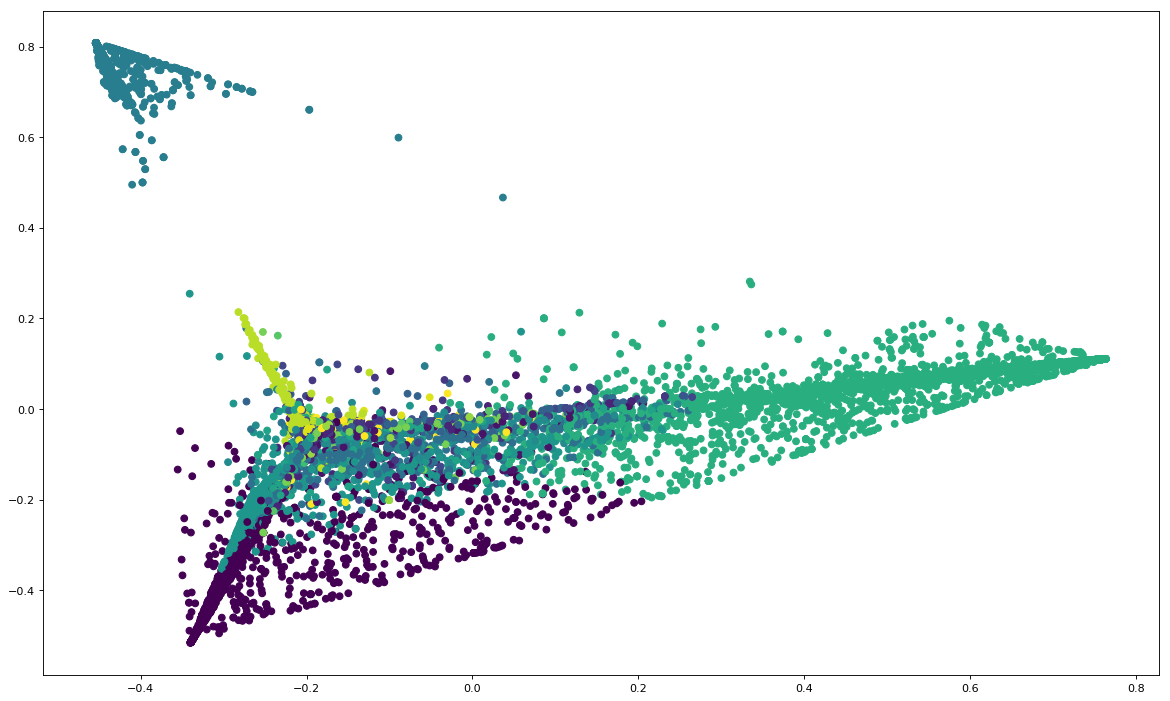

In [5]:
X_pca = PCA().fit_transform(topics_data)
figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

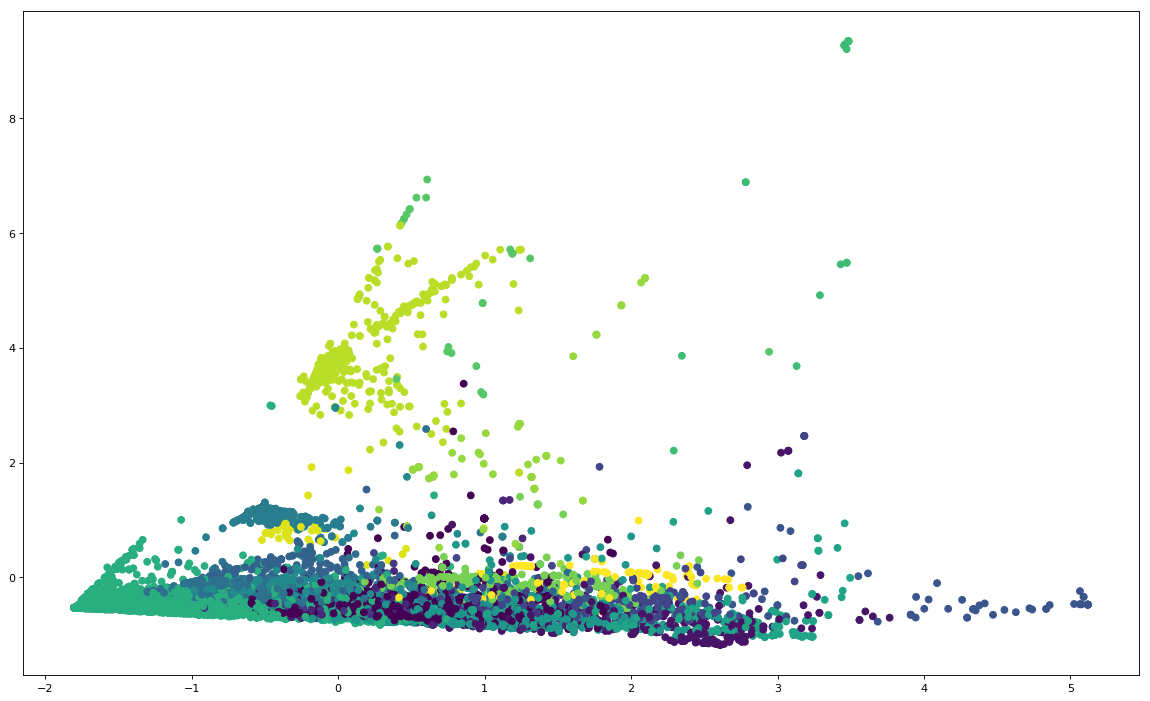

In [6]:
topics_data_norm  = stats.zscore(topics_data, axis=0)

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

In [3]:
topics_data = np.zeros(shape=(len(corpus) / 2, 20))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]
            
topics_data_norm = stats.zscore(topics_data, axis=0)

color = []
for line in topics_data_norm:
    color_number =[i for i, j in enumerate(line) if j == max(line)]
    color.append(int(color_number[0]))

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

NameError: name 'corpus' is not defined